In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banktelemarketing/bank telemarketing.xlsx


## Predicting Customer Response to Telemarketing Campaigns

## Problem Statement:
### The Telemarketing Team of a Bank runs campaigns to expand the term deposit portfolio. You are requested to enable prioritization for the Telemarketing team, so that overall responses and ROI of the campaign increases


### Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 3.2 MB/s            
Note: you may need to restart the kernel to use updated packages.


## Importing Dataset

In [4]:
df = pd.read_excel('/kaggle/input/banktelemarketing/bank telemarketing.xlsx')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.shape

(45211, 17)

In [7]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
import warnings
warnings.filterwarnings('ignore')

## Label the target feature to 1/0

In [10]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [11]:
df['target'] = np.where(df['y']=='yes',1,0)

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


### drop the 'y' column, only retain the Target

In [13]:
df.drop(labels=['y'], inplace=True, axis = 1)

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Defining Target and Independent Features

In [15]:
Y = df[['target']]
X = df.drop(['target'], axis=1)


## Get the Event rate

In [16]:
Y.mean()

#so we can say hat anything above that 11% is higher than average response rate so these can be targeted as well

target    0.116985
dtype: float64

## Split Features into Numerical and Categorical

In [17]:
X.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [18]:
num = X.select_dtypes(include = 'number')
char = X.select_dtypes(include = 'object')

In [19]:
num.dtypes

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [20]:
def unique_levels(x):
    x = x.value_counts().count()
    return (x)

df_value_counts = pd.DataFrame(num.apply(lambda x:unique_levels(x)))
df_value_counts.rename(columns={0:'feature_levels'}, inplace=True)

In [21]:
df_value_counts

,feature_levels
age,77
balance,7168
day,31
duration,1573
campaign,48
pdays,559
previous,41


In [22]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

#we can see all the numerical columns are having 20 or more levels so we can conclude that all numerical as actually numerical and not
#categorical having numerical values

Series([], dtype: object)

In [23]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [24]:
num.dtypes

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

## Outlier Analysis of Numerical Feature

In [25]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
1%,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
5%,27.000000,-172.000000,3.000000,35.000000,1.000000,-1.000000,0.000000
10%,29.000000,0.000000,5.000000,58.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000


## Capping and Flooring of Outliers
 we do capping because we want to make sure that we capture almost all of the original vairance present in the dataset
 and we account for the maximum of the data given

In [26]:
def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

In [27]:
num = num.apply(lambda x:outlier_cap(x))

In [28]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.887660,1278.121689,15.813541,254.375993,2.691403,39.313884,0.524689
std,10.384267,2249.406970,8.310221,234.779511,2.585740,96.035004,1.457817
min,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
1%,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
5%,27.000000,-172.000000,3.000000,35.000000,1.000000,-1.000000,0.000000
10%,29.000000,0.000000,5.000000,58.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000


## Missing value analysis

In [29]:
num.isnull().mean()

age         0.0
balance     0.0
day         0.0
duration    0.0
campaign    0.0
pdays       0.0
previous    0.0
dtype: float64

In [30]:
char.isnull().mean()

job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
contact      0.0
month        0.0
poutcome     0.0
dtype: float64

In [31]:
#in case of missing values 

#Impute using the below snippet  for Numerical
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

#For Categorical
#from sklearn.impute import SimpleImputer
#imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)


## Feature Selection

## Part 1 : Remove Features with 0 Variance

In [32]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold = 0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices = True)
num_1 = num.iloc[:,cols]

In [33]:
num_1.iloc[0]

age           58.0
balance     2143.0
day            5.0
duration     261.0
campaign       1.0
pdays         -1.0
previous       0.0
Name: 0, dtype: float64

## Part 2: Bi Variate Analysis(Feature Discretization)

In [34]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode = 'ordinal', strategy = 'quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_1), index = num_1.index, columns = num_1.columns).add_suffix('_Rank')
num_binned.head()

,age_Rank,balance_Rank,day_Rank,duration_Rank,campaign_Rank,pdays_Rank,previous_Rank
0,9.0,8.0,1.0,6.0,0.0,0.0,0.0
1,6.0,2.0,1.0,4.0,0.0,0.0,0.0
2,2.0,1.0,1.0,1.0,0.0,0.0,0.0
3,7.0,7.0,1.0,2.0,0.0,0.0,0.0
4,2.0,1.0,1.0,5.0,0.0,0.0,0.0


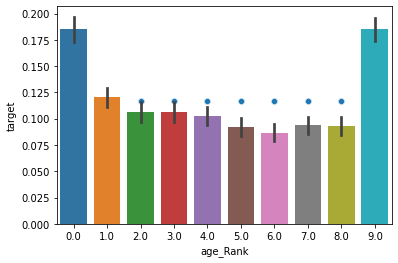

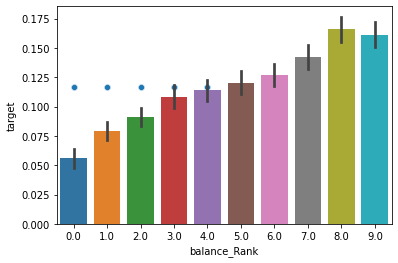

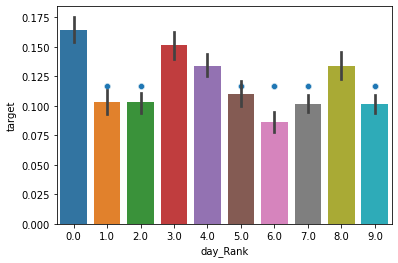

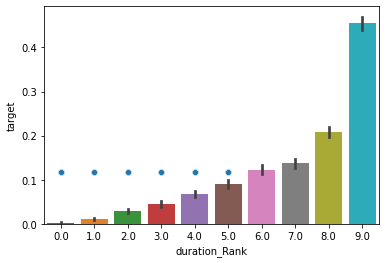

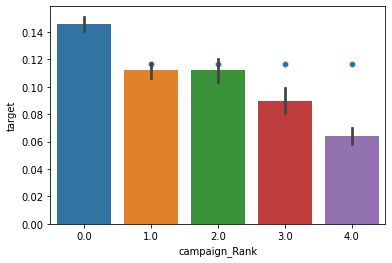

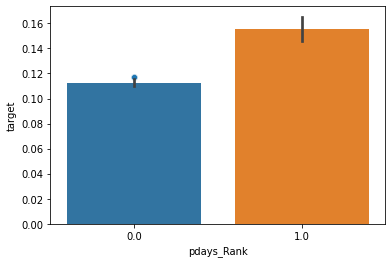

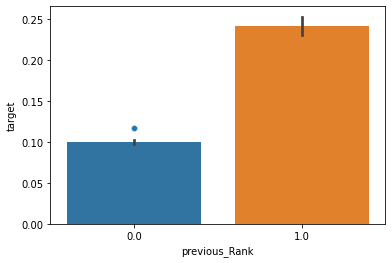

In [35]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

X_bin_combined = pd.concat([Y, num_binned], join = 'inner', axis=1)

from numpy import mean
for col in num_binned.columns:
    plt.figure()
    sns.scatterplot(x=col, y=X_bin_combined['target'].mean(), data = X_bin_combined)
    sns.barplot(x=col, y=X_bin_combined['target'], data = X_bin_combined, estimator=mean)

plt.show()


In [36]:
num_1 = num_1.drop(['pdays', 'age'], axis=1)

In [37]:
num_1.columns

Index(['balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')

In [38]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num = num_1
select_features_df_num.shape

(45211, 5)

## Feature Selection - Categorical Variables

## Part 1: Bivariate Analysis 

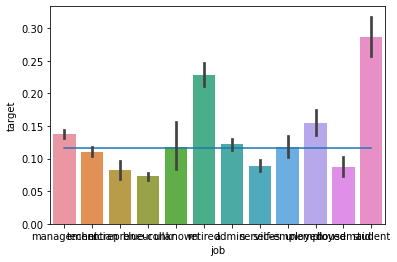

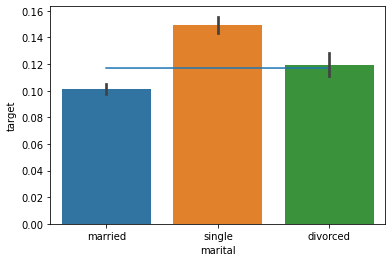

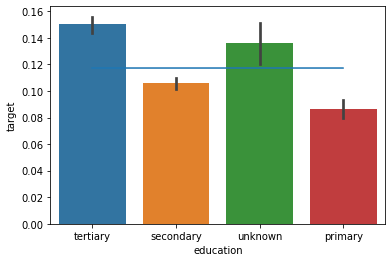

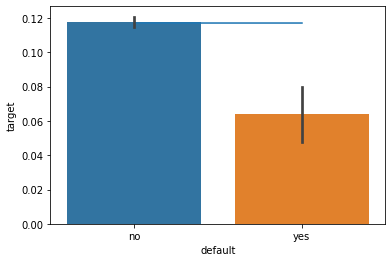

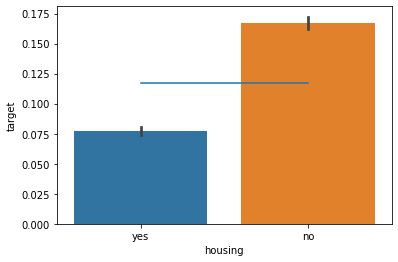

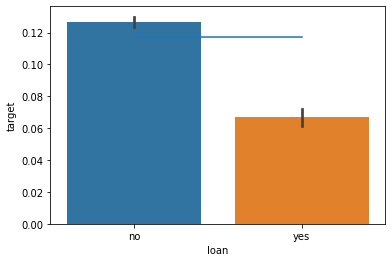

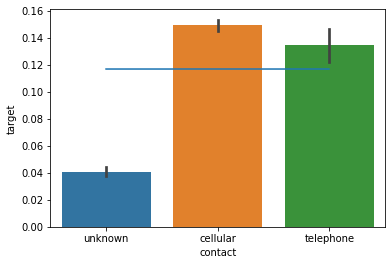

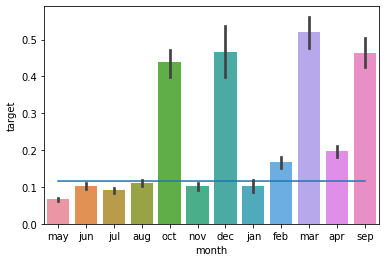

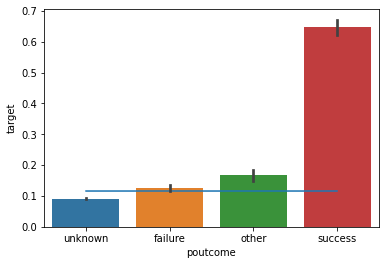

In [39]:

X_char_merged = pd.concat([Y, char], join = 'inner', axis=1)

for col in char.columns:
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['target'].mean(), data = X_char_merged)
    sns.barplot(x=col, y=X_char_merged['target'], data = X_char_merged, estimator=mean)

plt.show()

In [40]:
char=char.drop(['education','marital','poutcome'],axis=1)

In [41]:
char.dtypes

job        object
default    object
housing    object
loan       object
contact    object
month      object
dtype: object

## Create Dummy Variables

In [42]:
# Create dummy features with n-1 levels

X_char_dum = pd.get_dummies(char, drop_first=True)
X_char_dum.shape

(45211, 27)

## Part 2: Select K Best

In [43]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [44]:
select_features_df_char.dtypes

job_blue-collar     uint8
job_entrepreneur    uint8
job_housemaid       uint8
job_management      uint8
job_retired         uint8
job_services        uint8
job_student         uint8
job_unemployed      uint8
default_yes         uint8
housing_yes         uint8
loan_yes            uint8
contact_unknown     uint8
month_dec           uint8
month_feb           uint8
month_jul           uint8
month_jun           uint8
month_mar           uint8
month_may           uint8
month_oct           uint8
month_sep           uint8
dtype: object

## Creating the Master Feature Set for Model Development

In [45]:
X_all = pd.concat([select_features_df_char, select_features_df_num], join= 'inner', axis=1)

In [46]:
X_all.shape

(45211, 25)

## Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [48]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

# y_train.mean() and y_test.mean() is used for to check the homogenity and stability among training and testing data
# ideally train and test mean should be as close as possible

Shape of Training Data (31647, 25)
Shape of Testing Data (13564, 25)
Response Rate in Training Data target    0.11663
dtype: float64
Response Rate in Testing Data target    0.117812
dtype: float64


## Model Building 

In [49]:
#Building Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [50]:
#Building Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=200)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=200, random_state=0)

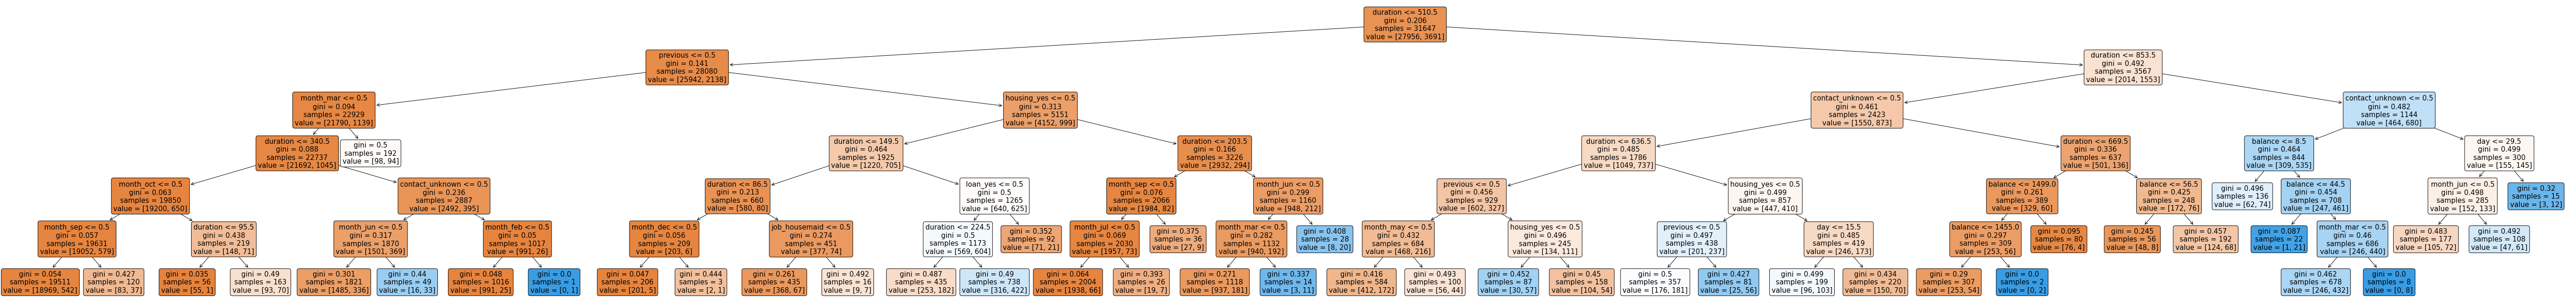

In [51]:
from sklearn import tree
# import pydotplus
plt.figure(figsize=(100,12))
tree.plot_tree(dtree, filled = True, fontsize=15, rounded=True, feature_names=X_all.columns)
plt.show()

In [52]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0, max_depth=6, min_samples_split=200)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=200, random_state=0)

In [53]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
duration,0.537526
previous,0.104541
housing_yes,0.069508
contact_unknown,0.055530
month_mar,0.049977
month_oct,0.042511
month_sep,0.034997
balance,0.019231
month_may,0.016289
day,0.014707


In [54]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=200)),
                        ('dtree', DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=200))  
                ] 

In [55]:
# stacking
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators = base_learners, final_estimator=LogisticRegression(), cv=5)

In [56]:
clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=200,
                                                       random_state=0)),
                               ('dtree',
                                DecisionTreeClassifier(max_depth=6,
                                                       min_samples_split=200,
                                                       random_state=0))],
                   final_estimator=LogisticRegression())

In [57]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_stacking=clf.predict(X_test)

## Model Evaluation

In [58]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix  

In [59]:
print('Logistic Regression')
print('Accuracy:',metrics.accuracy_score(y_test, y_pred_logreg))
print('Precision:',metrics.precision_score(y_test,y_pred_logreg))
print('Recall:',metrics.recall_score(y_test,y_pred_logreg))
print('f1_score:',metrics.f1_score(y_test,y_pred_logreg))

Logistic Regression
Accuracy: 0.8829253907401946
Precision: 0.5060827250608273
Recall: 0.26032540675844806
f1_score: 0.34380165289256204


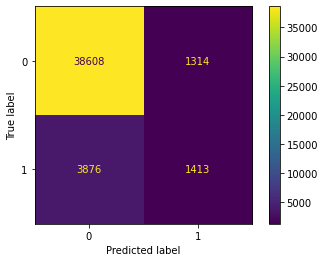

In [60]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [61]:
print('Decision Tree')
print('Accuracy:',metrics.accuracy_score(y_test, y_pred_tree))
print('Precision:',metrics.precision_score(y_test,y_pred_tree))
print('Recall:',metrics.recall_score(y_test,y_pred_tree))
print('f1_score:',metrics.f1_score(y_test,y_pred_tree))

Decision Tree
Accuracy: 0.8934680035387791
Precision: 0.5697356426618049
Recall: 0.3911138923654568
f1_score: 0.46382189239332094


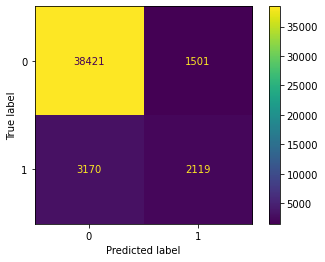

In [62]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [63]:
print('Random Forest')
print('Accuracy:',metrics.accuracy_score(y_test, y_pred_rf))
print('Precision:',metrics.precision_score(y_test,y_pred_rf))
print('Recall:',metrics.recall_score(y_test,y_pred_rf))
print('f1_score:',metrics.f1_score(y_test,y_pred_rf))

Random Forest
Accuracy: 0.8828516661751695
Precision: 0.68
Recall: 0.010638297872340425
f1_score: 0.020948860135551448


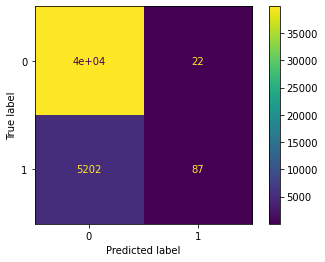

In [64]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [65]:
print('Stacking Classifier')
print('Accuracy:',metrics.accuracy_score(y_test, y_pred_stacking))
print('Precision:',metrics.precision_score(y_test,y_pred_stacking))
print('Recall:',metrics.recall_score(y_test,y_pred_stacking))
print('f1_score:',metrics.f1_score(y_test,y_pred_stacking))

Stacking Classifier
Accuracy: 0.8968593335299322
Precision: 0.602051282051282
Recall: 0.36733416770963706
f1_score: 0.4562767197823552


## Gains Chart Analysis

In [66]:
# Gains Chart Analysis
# This will help understand the power of discrimination offered by the model's estimated probabilities

### Gains for Logistic Regression

In [67]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)

df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1

rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)

sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4521,0.473125,0.590129,2139.0,2139.0,0.404424,0.404424,2382.0,2382.0,0.059666,0.059666,0.3448,0.099998,0.099998,1
1,9,4521,0.252599,0.269952,1142.0,3281.0,0.215920,0.620344,3379.0,5761.0,0.084640,0.144306,0.4760,0.099998,0.199996,2
2,8,4521,0.156824,0.163149,709.0,3990.0,0.134052,0.754396,3812.0,9573.0,0.095486,0.239793,0.5146,0.099998,0.299993,3
3,7,4521,0.105508,0.108689,477.0,4467.0,0.090187,0.844583,4044.0,13617.0,0.101298,0.341090,0.5035,0.099998,0.399991,4
4,6,4521,0.072329,0.076135,327.0,4794.0,0.061826,0.906410,4194.0,17811.0,0.105055,0.446145,0.4603,0.099998,0.499989,5
5,5,4521,0.045344,0.053695,205.0,4999.0,0.038760,0.945169,4316.0,22127.0,0.108111,0.554256,0.3909,0.099998,0.599987,6
6,4,4521,0.029639,0.037669,134.0,5133.0,0.025336,0.970505,4387.0,26514.0,0.109889,0.664145,0.3064,0.099998,0.699985,7
7,3,4521,0.019022,0.025176,86.0,5219.0,0.016260,0.986765,4435.0,30949.0,0.111092,0.775237,0.2115,0.099998,0.799982,8
8,2,4521,0.011060,0.014265,50.0,5269.0,0.009454,0.996219,4471.0,35420.0,0.111993,0.887230,0.1090,0.099998,0.899980,9
9,1,4522,0.004423,0.004713,20.0,5289.0,0.003781,1.000000,4502.0,39922.0,0.112770,1.000000,0.0000,0.100020,1.000000,10


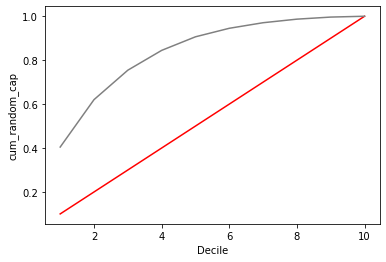

In [68]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

### Gains for Decision Tree

In [69]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4521,0.562486,0.562869,2543.0,2543.0,0.480809,0.480809,1978.0,1978.0,0.049547,0.049547,0.4313,0.099998,0.099998,1
1,9,4521,0.288211,0.273576,1303.0,3846.0,0.246360,0.727170,3218.0,5196.0,0.080607,0.130154,0.5970,0.099998,0.199996,2
2,8,4521,0.127627,0.137568,577.0,4423.0,0.109094,0.836264,3944.0,9140.0,0.098793,0.228946,0.6073,0.099998,0.299993,3
3,7,4521,0.105950,0.030013,479.0,4902.0,0.090565,0.926829,4042.0,13182.0,0.101247,0.330194,0.5966,0.099998,0.399991,4
4,6,4521,0.063482,0.027779,287.0,5189.0,0.054264,0.981093,4234.0,17416.0,0.106057,0.436251,0.5448,0.099998,0.499989,5
5,5,4521,0.006857,0.027779,31.0,5220.0,0.005861,0.986954,4490.0,21906.0,0.112469,0.548720,0.4382,0.099998,0.599987,6
6,4,4521,0.001327,0.027779,6.0,5226.0,0.001134,0.988088,4515.0,26421.0,0.113096,0.661816,0.3263,0.099998,0.699985,7
7,3,4521,0.000885,0.027779,4.0,5230.0,0.000756,0.988845,4517.0,30938.0,0.113146,0.774961,0.2139,0.099998,0.799982,8
8,2,4521,0.000885,0.027779,4.0,5234.0,0.000756,0.989601,4517.0,35455.0,0.113146,0.888107,0.1015,0.099998,0.899980,9
9,1,4522,0.012163,0.026362,55.0,5289.0,0.010399,1.000000,4467.0,39922.0,0.111893,1.000000,-0.0000,0.100020,1.000000,10


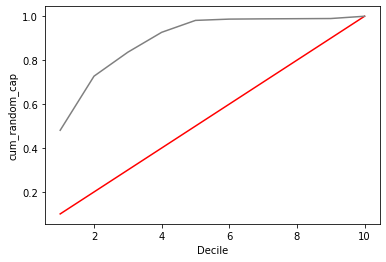

In [70]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

### Gains for Random Forest

In [71]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4521,0.573767,0.382241,2594.0,2594.0,0.490452,0.490452,1927.0,1927.0,0.048269,0.048269,0.4422,0.099998,0.099998,1
1,9,4521,0.301924,0.244191,1365.0,3959.0,0.258083,0.748535,3156.0,5083.0,0.079054,0.127323,0.6212,0.099998,0.199996,2
2,8,4521,0.162132,0.139612,733.0,4692.0,0.138590,0.887124,3788.0,8871.0,0.094885,0.222208,0.6649,0.099998,0.299993,3
3,7,4521,0.069454,0.097285,314.0,5006.0,0.059369,0.946493,4207.0,13078.0,0.105380,0.327589,0.6189,0.099998,0.399991,4
4,6,4521,0.030082,0.078833,136.0,5142.0,0.025714,0.972206,4385.0,17463.0,0.109839,0.437428,0.5348,0.099998,0.499989,5
5,5,4521,0.015041,0.067199,68.0,5210.0,0.012857,0.985063,4453.0,21916.0,0.111543,0.548970,0.4361,0.099998,0.599987,6
6,4,4521,0.008184,0.056787,37.0,5247.0,0.006996,0.992059,4484.0,26400.0,0.112319,0.661290,0.3308,0.099998,0.699985,7
7,3,4521,0.005751,0.046965,26.0,5273.0,0.004916,0.996975,4495.0,30895.0,0.112595,0.773884,0.2231,0.099998,0.799982,8
8,2,4521,0.003097,0.032995,14.0,5287.0,0.002647,0.999622,4507.0,35402.0,0.112895,0.886779,0.1128,0.099998,0.899980,9
9,1,4522,0.000442,0.021513,2.0,5289.0,0.000378,1.000000,4520.0,39922.0,0.113221,1.000000,0.0000,0.100020,1.000000,10


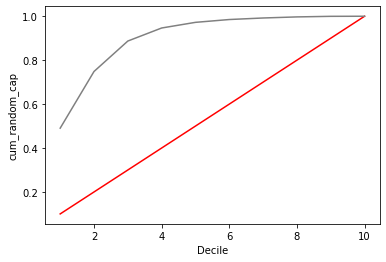

In [72]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

### Gains for Stacking Classifier

In [73]:
y_pred_prob = clf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4521,0.575094,0.590799,2600.0,2600.0,0.491586,0.491586,1921.0,1921.0,0.048119,0.048119,0.4435,0.099998,0.099998,1
1,9,4521,0.301482,0.244611,1363.0,3963.0,0.257705,0.749291,3158.0,5079.0,0.079104,0.127223,0.6221,0.099998,0.199996,2
2,8,4521,0.160805,0.083717,727.0,4690.0,0.137455,0.886746,3794.0,8873.0,0.095035,0.222258,0.6645,0.099998,0.299993,3
3,7,4521,0.071666,0.052408,324.0,5014.0,0.061259,0.948005,4197.0,13070.0,0.105130,0.327388,0.6206,0.099998,0.399991,4
4,6,4521,0.028534,0.042684,129.0,5143.0,0.024390,0.972396,4392.0,17462.0,0.110015,0.437403,0.5350,0.099998,0.499989,5
5,5,4521,0.014820,0.037601,67.0,5210.0,0.012668,0.985063,4454.0,21916.0,0.111568,0.548970,0.4361,0.099998,0.599987,6
6,4,4521,0.008184,0.033566,37.0,5247.0,0.006996,0.992059,4484.0,26400.0,0.112319,0.661290,0.3308,0.099998,0.699985,7
7,3,4521,0.005751,0.030173,26.0,5273.0,0.004916,0.996975,4495.0,30895.0,0.112595,0.773884,0.2231,0.099998,0.799982,8
8,2,4521,0.003097,0.025939,14.0,5287.0,0.002647,0.999622,4507.0,35402.0,0.112895,0.886779,0.1128,0.099998,0.899980,9
9,1,4522,0.000442,0.022834,2.0,5289.0,0.000378,1.000000,4520.0,39922.0,0.113221,1.000000,0.0000,0.100020,1.000000,10


In [74]:
df['Predicted_Response_Rank']=np.where(df['P_Rank_rf']>8,"Top 2","Bottom 8")

In [75]:
df.groupby('Predicted_Response_Rank')['target'].agg(['mean'])

#as we can see top2 decile response rate is very very high compared to bottom8 

,mean
Predicted_Response_Rank,
Bottom 8,0.036661
Top 2,0.438288


In [76]:
df['Duration_Rank']=pd.qcut(df['duration'].rank(method='first').values,10,duplicates='drop').codes+1

In [77]:
df.groupby('Duration_Rank')['duration'].agg(['min','mean','max'])

,min,mean,max
Duration_Rank,,,
1,0,33.406236,58
2,58,74.518027,89
3,89,103.048662,117
4,117,131.704711,147
5,147,162.879894,180
6,180,200.728379,223
7,223,249.426676,280
8,280,320.294183,368
9,368,444.415837,548


In [78]:
df['duration'].mean()

258.1630797814691

In [79]:
df['duration_segment']=np.where(df['Duration_Rank']>7,"High Duration","Low Duration")
df.duration_segment.value_counts()

Low Duration     31648
High Duration    13563
Name: duration_segment, dtype: int64

In [80]:
pd.crosstab(index=df['duration_segment'], columns=df['Predicted_Response_Rank'],values=df['target'],aggfunc='mean')

Predicted_Response_Rank,Bottom 8,Top 2
duration_segment,,
High Duration,0.079792,0.461550
Low Duration,0.026461,0.373801


In [81]:
pd.crosstab(index=df['duration_segment'], columns=df['Predicted_Response_Rank'],values=df['Predicted_Response_Rank'],aggfunc='count')

Predicted_Response_Rank,Bottom 8,Top 2
duration_segment,,
High Duration,6918,6645
Low Duration,29251,2397
